## Часть 1. Приоритизация гипотез

### Подготовка данных

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
#загрузка файла hypothesis и вывод информации
hipothesis = pd.read_csv('/datasets/hypothesis.csv')
pd.options.display.max_colwidth = 1
display(hipothesis)
hipothesis.info()

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [3]:
hipothesis.columns = hipothesis.columns.str.lower()#замена названий на нижний регистр

Данная таблица небольшая, без использования функций видно, что отсутствую пропуски и дубликаты. Для удобства заменили все буквы в названиях столбцов на нижний регистр. Все типы данных корректны. Данные готовы к дальнейшему исследованию.

### ICE и RICE

In [4]:
# проведем приоритезацию гипотез с помощью способа ICE
hipothesis['ICE'] = hipothesis['impact'] * hipothesis['confidence'] / hipothesis['efforts']
pd.options.display.max_colwidth = 1
display(hipothesis.loc[:, ['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


Наиболее перспективные гипотезы по ICE: 8, 0 и 7.

In [5]:
# проведем приоритезацию гипотез с помощью способа RICE
hipothesis['RICE'] = hipothesis['reach'] * hipothesis['impact'] * hipothesis['confidence'] / hipothesis['efforts']
pd.options.display.max_colwidth = 1
display(hipothesis.loc[:, ['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))


,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


В данном случае наиболее перспективными гипотезами являютяся: 7 и 2.

Гипотеза под номером 7 оказалась в обоих списках, ее можно рассматривать как наиболее перспективную. Разница в полученных разными методами результатах объясняется значением Reach - количество пользователей, которое затронет изменение, которое появляется в числителе при расчете способом RICE. Данный показатель для гипотезы №7 = 10.

## Часть 2. Анализ A/B-теста

### Подготовка данных

In [6]:
#загрузка файла orders и вывод информации
orders_old = pd.read_csv('/datasets/orders.csv')
display(orders_old)
orders_old.info()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [7]:
print(orders_old.isna().sum())#проверка на пропуски
print()
print('Дубликаты', orders_old.duplicated().sum())#проверка на дубликаты

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

Дубликаты 0


In [8]:
# преобразовываем данные столбца data в формат datetime
orders_old['date'] = orders_old['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [9]:
#загрузка файла visitors и вывод информации
visitors = pd.read_csv('/datasets/visitors.csv')
display(visitors)
visitors.info()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [10]:
# преобразовываем данные столбца data в формат datetime
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [11]:
print(visitors.isna().sum())#проверка на пропуски
print()
print('Дубликаты', visitors.duplicated().sum())#проверка на дубликаты

date        0
group       0
visitors    0
dtype: int64

Дубликаты 0


В данных отсутствуют пропуски и дубликаты, названия столбцов удобны в использовании. Данные столбцов data приведены к корректному формату datetime. Данные готовы для дальнейшего исследования.

### График кумулятивной выручки по группам

Перед анализом А/В-теста проверим, есть ли в данных пользователи, которые входят в обе группы.

In [12]:
user_group = orders_old[['visitorId','group']].drop_duplicates()#сформируем таблицу с уникальными пользователями по группам
#проверим наличие дубликатов среди всех групп
ids = user_group['visitorId']
user_dublicat = user_group[ids.isin(ids[ids.duplicated()])].sort_values("visitorId")
display(user_dublicat)

,visitorId,group
703,8300375,A
71,8300375,B
26,199603092,A
246,199603092,B
1013,232979603,A
...,...,...
814,4186807279,B
114,4256040402,A
60,4256040402,B
662,4266935830,A


Найдено 58 пользователей, которые занесены как в группу А, так и в группу В. Для дальнейшего анализа удалим данных пользователей.


In [13]:
# проверим сколько записей по данным пользователям
user = user_dublicat['visitorId']
print(orders_old.query('visitorId in @user').count())

transactionId    181
visitorId        181
date             181
revenue          181
group            181
dtype: int64


Найдена 181 запись с данными пользователями, эта информация необходима для проверки корректности удаления.

In [14]:
# удалим пользователей, которые занесены в обе группы
user = user_dublicat['visitorId']
orders = orders_old.query('visitorId not in @user')
display(orders)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
...,...,...,...,...,...
1191,3592955527,608641596,2019-08-14,16490,B
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A


В таблице осталось 1016 записей, что говорит о корректном удалении дублирующихся для обеих групп пользователей.

In [15]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

In [16]:
# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': 'nunique',
            'visitorId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max', 
            'group': 'max', 
            'visitors': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

In [17]:
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

display(cumulativeData) 

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845
...,...,...,...,...,...,...
57,2019-08-29,B,510,490,4746610,17708
58,2019-08-30,A,460,437,3311413,18037
59,2019-08-30,B,531,511,4955833,18198
60,2019-08-31,A,468,445,3364656,18736


In [18]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

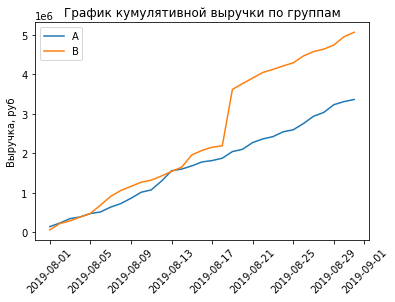

In [19]:
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.ylabel('Выручка, руб')
plt.title('График кумулятивной выручки по группам')
plt.xticks(rotation = 45)
plt.legend() 

В обеих группах выручка растет в течение всего теста, что хорошо. В группе B имеется точка резкого роста, из-за чего выручка в этой группе стала значительно больше, чем в группе А. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке.

### График кумулятивного среднего чека по группам

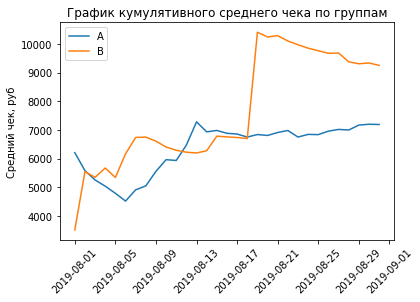

In [20]:
# Строим графики среднего чека по группами
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.ylabel('Средний чек, руб')
plt.title('График кумулятивного среднего чека по группам')
plt.xticks(rotation = 45)
plt.legend()

В обеих группах имеет место рост среднего чека. В группе B наблюдается значительный скачок, который мы также видели на предыдущем графике.

### График относительного изменения кумулятивного среднего чека группы B к группе A

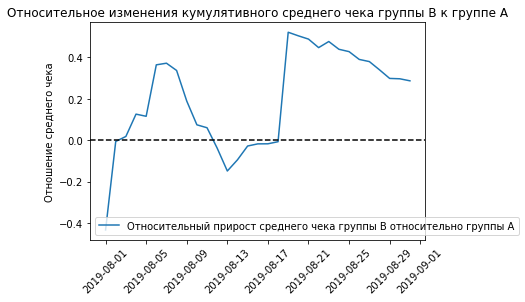

In [21]:
# собираем график относительного изменения кумулятивного среднего чека группы B к группе A
# собираем данные в одном датафрейме
mergedCumulativeRevenue = (
    cumulativeRevenueA.
    merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
)
# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], 
         (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/
         (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1, 
         label='Относительный прирост среднего чека группы B относительно группы A')
plt.ylabel('Отношение среднего чека')
plt.title('Относительное изменения кумулятивного среднего чека группы B к группе A')
plt.xticks(rotation = 45)
plt.legend()

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 

График различий среднего чека очень колеблется, что говорит о имеющихся аномалиях.

### График кумулятивной конверсии по группам

(18109.0, 18140.0, 0.0, 0.05)

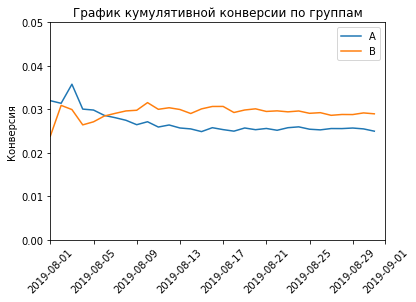

In [22]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.ylabel('Конверсия')
plt.title('График кумулятивной конверсии по группам')
plt.xticks(rotation = 45)
plt.legend()

# задаем масштаб осей
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), 0, 0.05]) 

Графики конверсии стабилизировались для обоих групп. Конверсия группы В выше конверсии группы А, хотя в начале теста некоторое время конверсия в группе А лидировала.

### График относительного изменения кумулятивной конверсии группы B к группе A

(18109.0, 18139.0, -0.5, 0.5)

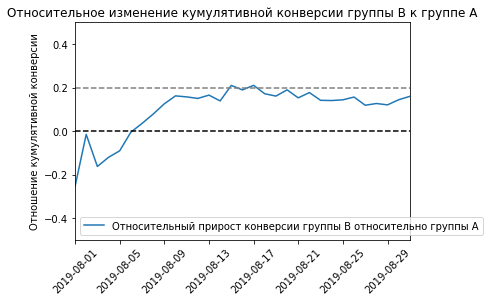

In [23]:
# Построим график относительного изменения кумулятивной конверсии группы B к группе A
mergedCumulativeConversions = (
    cumulativeDataA[['date','conversion']]
    .merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
)
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.ylabel('Отношение кумулятивной конверсии')
plt.title('Относительное изменение кумулятивной конверсии группы B к группе A')
plt.xticks(rotation = 45)
plt.legend(loc='lower left')

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.axis([mergedCumulativeConversions['date'].min(), mergedCumulativeConversions['date'].max(), -0.5, 0.5]) 

Лишь в начале проведения тест конверсия группы В была ниже чем группы А, после чего конверсия в группе В обогнала конверсию в группе А и стабилизировалась.

### Точечный график количества заказов по пользователям

Text(0.5, 1.0, 'График количества заказов по пользователям')

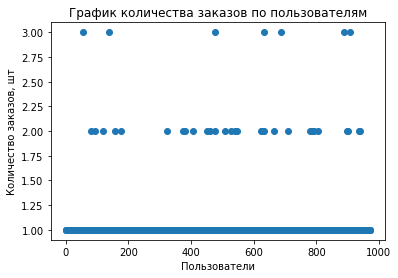

In [24]:
#соберем таблицу количества заказов по пользователям
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

ordersByUsers.columns = ['visitorId', 'orders']

# построим точечный график количества заказов по пользователям
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders']) 
plt.ylabel('Количество заказов, шт')
plt.xlabel('Пользователи')
plt.title('График количества заказов по пользователям')

Количество заказов составляет 1-3, явные аномалии отсутствуют. Количество пользователей с 3-мя заказами достаточно мало, но для корректного определения верхней границы количества заказов рассчитаем 95-й и 99-й перцентиль.

### 95-й и 99-й перцентили количества заказов на пользователя

In [25]:
# посчитаем 95-й и 99-й перцентили количества заказов на пользователя
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[1. 2.]


Не более 5% пользователей оформляли больше одного раза. И только 1% пользователей заказывали более 2 раз. Разумно выбрать 2 заказа на одного пользователя за верхнюю границу числа заказов, и отсеять аномальных пользователей по ней.

### Точечный график стоимостей заказов

Text(0.5, 1.0, 'График стоимостей заказов')

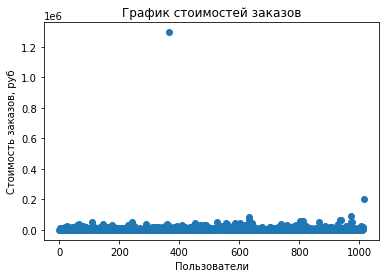

In [26]:
# построим точечный график стоимостей заказов
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.ylabel('Стоимость заказов, руб')
plt.xlabel('Пользователи')
plt.title('График стоимостей заказов')

На графике видно, что имеет место много недорогих заказов. Из графика сложно выбрать границу аномальных заказов, поэтому для наглядности отсечем явные аномалии, увеличив масштаб графика. 

Text(0.5, 1.0, 'График стоимостей заказов')

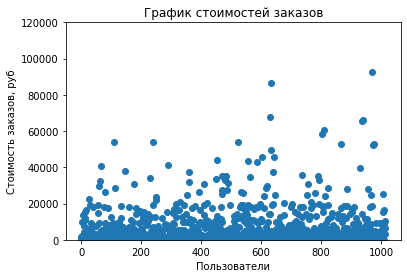

In [27]:
# построим точечный график стоимостей заказов
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.ylim([0, 120000])
plt.ylabel('Стоимость заказов, руб')
plt.xlabel('Пользователи')
plt.title('График стоимостей заказов')

Теперь на графике видно, что большинсво заказов не превышают сумму в 40000 руб. Для более точного определения аномалий рассчитаем 95-й и 99-й перцентили стоимости заказов.

### 95-й и 99-й перцентили стоимости заказов

In [28]:
# посчитаем 95-й и 99-й перцентили стоимости заказов
print(np.percentile(orders['revenue'], [95, 99])) 

[26785. 53904.]


Не более 5% пользователей оформляли больше чем на 26785 рублей. И только 1% пользователей заказывали больше чем на 53904 рублей. Разумно выбрать за верхнюю границу стоимости заказа 35000 рублей и отсеять аномальных пользователей по ней.

 ### Статистическая значимость различий в конверсии между группами по «сырым» данным

In [29]:
# определяем данные по группе А
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

# определяем данные по группе В
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

# определяем данные по группе А
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

# определяем данные по группе В
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

#объединяем полученные таблицы
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

display(data)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280
5,2019-08-06,15,40919,23,214842,114,515332,112,690490,667,655,3985,3935
6,2019-08-07,16,123248,23,219164,130,638580,135,909654,644,709,4629,4644
7,2019-08-08,14,88639,22,150141,144,727219,157,1059795,610,654,5239,5298
8,2019-08-09,11,134237,19,103166,155,861456,176,1162961,617,610,5856,5908
9,2019-08-10,15,152275,22,105162,170,1013731,198,1268123,406,369,6262,6277


Из проведенного исследования видно, что в данных имеют место значительные выбросы, которые могут серьезно повлиять на результат. Поэтому, для проверки гипотез воспользуемся непараметрическим тестом Манна-Уитни. 

<b>Нулевая гипотеза:</b> Cтатистически значимых различий в конверсии между группами нет.

<b>Альтернативная гипотеза:</b> В конверсии между группами есть статистически значимые различия.
    
- критический уровень статистической значимости примем за 0.05

In [30]:
# посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders'] 

sampleA = (
    pd.concat([ordersByUsersA['orders'],
               pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],
              axis=0)
        )

sampleB = (
    pd.concat([ordersByUsersB['orders'],
               pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],
              axis=0)
        )
print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

0.011
0.160


Значение p-value = 0.011 значительно меньше 0.05, потому нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, можно отвергать. Анализ данных говорит о том, что в конверсии между группами есть статистически значимые различия. Относительный прирост конверсии группы В к группе А составил 16%.

### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

<b>Нулевая гипотеза:</b> Cтатистически значимых различий в среднем чеке заказа между группами нет.

<b>Альтернативная гипотеза:</b> В среднем чеке заказа между группами есть статистически значимые различия.
    
- критический уровень статистической значимости примем за 0.05

In [31]:
# посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.829
0.287


p-value больше 0.05, что говорит о том, что статистически значимой разницы в среднем чеке между группами нет. А вот относительная разница между чеками составила 28,7%.

### Статистическая значимость различий в конверсии между группами по «очищенным» данным

In [32]:
# определим количество аномальных пользователей
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 35000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0]) 

1099    148427295
33      249864742
684     358944393
648     382846391
58      611059232
dtype: int64
37


В данных имеется 37 аномальных пользователя.

<b>Нулевая гипотеза:</b> Cтатистически значимых различий в конверсии между группами нет.

<b>Альтернативная гипотеза:</b> В конверсии между группами есть статистически значимые различия.
    
- критический уровень статистической значимости примем за 0.05

In [33]:
# посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

print('{0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.00700
0.194


Результат по конверсии относительно "сырых" данных практически не изменился.

### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

<b>Нулевая гипотеза:</b> Cтатистически значимых различий в среднем чеке заказа между группами нет.

<b>Альтернативная гипотеза:</b> В среднем чеке заказа между группами есть статистически значимые различия.
    
- критический уровень статистической значимости примем за 0.05

In [34]:
# посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

0.869
0.003


p-value больше 0.05 и увеличился относительно "сырых" данных, что говорит о том, что статистически значимой разницы в среднем чеке между группами нет. И относительная разница между чеками уменьшилась с 28,7% практически до 0%. Видно, что аномально дорогие заказы внесли значительное искажение в данные.

### Вывод по результатам теста

- Есть статистически значимые различия по конверсии между группами и по «сырым», и по данным после фильтрации аномалий;
- Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;
- График различия конверсии между группами сообщает, что результаты группы B стабильно лучше результатов группы A;
- График различия среднего чека говорит о том, что хоть для результата группы В имеется скачок в среднем чеке, после чего его значение снижалось, средний чек для группы В все равно остался выше, чем для группы А.

Исходя из вышеперечисленного стоит остановить тест, признать его успешным и зафиксировать победу группы B.

## Общий вывод

<b> Часть 1. Приоритизация гипотез</b>

С помощью способов ICE и RICE были приоритизированы 9 гипотез по увеличению прибыли интернет-магазина. Благодаря чему для дальнейшей проверки была выделена 1 гипотеза под №7, которая попала в список наиболее перспективных гипотез при расчете обоими способами.

<b> Часть 2. Анализ А/В-теста</b>

Перед проведением анализа результатов А/В-теста была проведена проверка на наличие пользователей, которые попали в обе группы. Такие пользователи были обнаружены и удалены для чистоты оценки теста. В ходе анализа результатов А/В-теста было определено, что конверсия в группе В стабильна и выше конверсии в группе А, что подтверждается проведенным тестом Манна-Уитни. А средний чек в обеих группах не имеет статистически значимой разницы. Исходя из полученых результатов предлагается остановить тест, признать его успешным и зафиксировать победу группы B.